In [1]:
from dlcprojecthelper import DLCProjectHelper as dph

In [7]:
dir_videos = "/local/data2/LIA_LIU_PONTUS/LIA_LIU/res_50_test-conv_vid-2024-11-04/videos"

In [2]:
project_path = "/local/data2/LIA_LIU_PONTUS/LIA_LIU/res_101_epoch_100-conv_vid-2024-11-06"

In [9]:
dph.show_mean_likelihood(project_path=project_path)

Mean likelihood for all values in smalltest: 0.8272
Mean likelihood for all values in 240frames: 0.8530
Mean likelihood for all values in 1-2: 0.9263
Mean likelihood for all values in 1-1: 0.9445
Mean likelihood for all values in 2-2k7-120-hand: 0.9198
Mean likelihood for all values in squaretest: 0.8973


In [3]:
dph.show_model_losses(project_path)

Log file not found in the specified path.


/tmp/ipykernel_1023649/1019750833.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['losses/eval.bodypart_total_loss'].interpolate(method='linear', inplace=True)


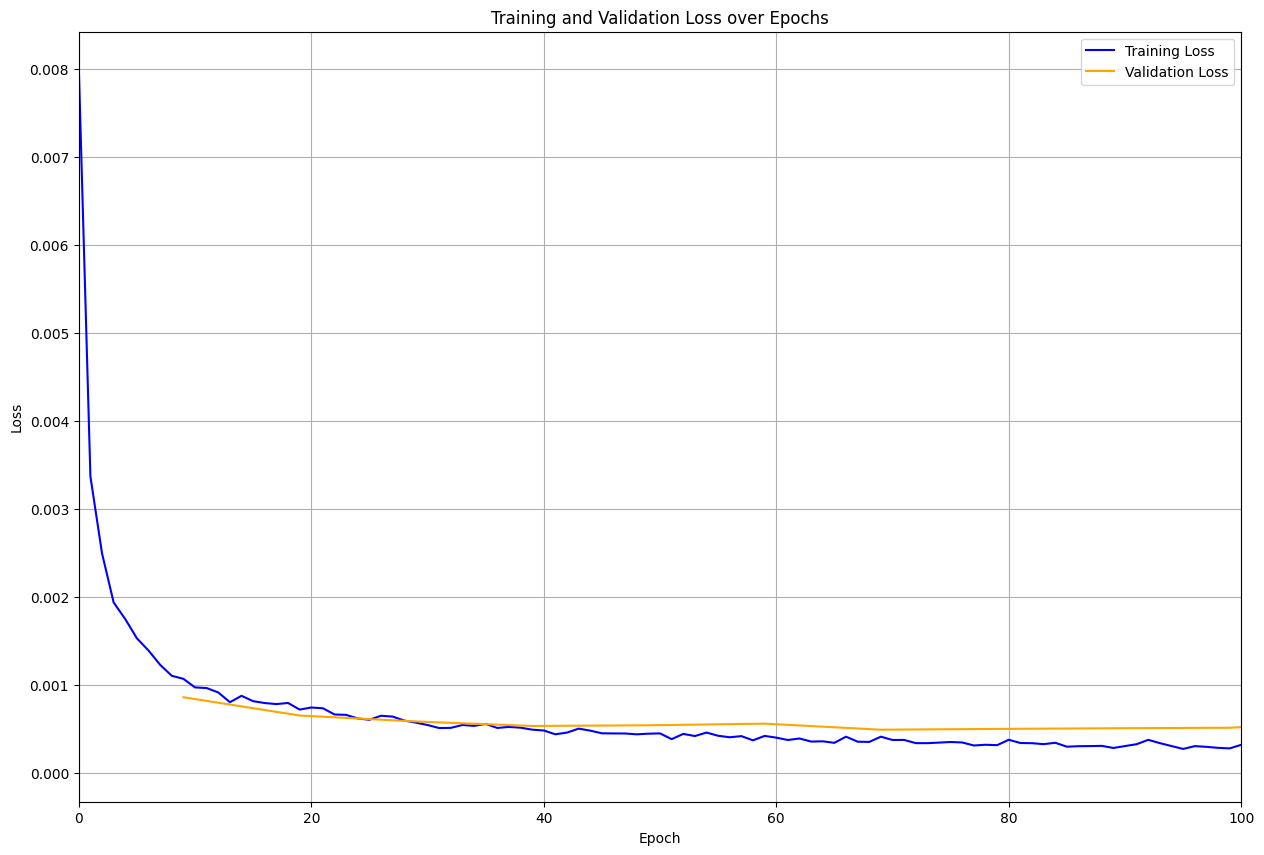

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Path to the DeepLabCut training log CSV file
csv_file = "/local/data2/LIA_LIU_PONTUS/LIA_LIU/res_50_test-conv_vid-2024-11-04/dlc-models-pytorch/iteration-1/res_50_testNov4-trainset90shuffle1/train/learning_stats.csv"

# Load the data into a pandas DataFrame
data = pd.read_csv(csv_file)

# Check if there are NaNs in the validation loss
if data['losses/eval.bodypart_total_loss'].isna().any():
    # Fill NaNs with interpolation for smooth plotting (optional)
    data['losses/eval.bodypart_total_loss'].interpolate(method='linear', inplace=True)

# Plot the training and validation loss over epochs
plt.figure(figsize=(15, 10))
plt.plot(data.index, data['losses/train.bodypart_total_loss'], label='Training Loss', color='blue')
plt.plot(data.index, data['losses/eval.bodypart_total_loss'], label='Validation Loss', color='orange')

# Adding labels and title
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss over Epochs')
plt.legend()
plt.grid()
plt.xlim(0, 100)
plt.show()


In [ ]:
import pandas as pd
import os

def mean_likelihood_func(directory):
    # search for .h5 file in directory
    h5_files = [f for f in os.listdir(directory) if f.endswith('.h5')]
    
    if not h5_files:
        print("No .h5-files found in the directory.")
        return
    
    for i, file_name in enumerate(h5_files, 1):
        variable_name = f"h5_file_{i}"
        file_path = os.path.join(directory, file_name)
        globals()[variable_name] = file_path  
        
        # Get video name
        display_name = file_name.split('_converted')[0]

        # Read h5 file and print likelihood mean
        try:
            df = pd.read_hdf(file_path)
            likelihood_df = df.xs('likelihood', level=2, axis=1)
            mean_likelihood = likelihood_df.values.mean()
            print(f"Likelihood mean for all values {display_name}: {mean_likelihood:.4f}")
            # print(likelihood_df.describe().transpose())
        except Exception as e:
            print(f"Couldn't read filepath : {file_path}: {e}")

# Res_50_test

In [ ]:
mean_likelihood_func("/local/data2/LIA_LIU_PONTUS/LIA_LIU/res_50_test-conv_vid-2024-11-04/videos")

# Arvidh 

In [ ]:
path = "/local/data2/LIA_LIU_PONTUS/LIA_LIU/arvidh_h5"

mean_likelihood_func(path)

# 7 Videos test

In [ ]:
path = "/local/data2/LIA_LIU_PONTUS/LIA_LIU/test_7_converted_vid-conv_vid-2024-10-24/videos"

mean_likelihood_func(path)

# 10_000 epochs (1425)


In [ ]:
path = "/local/data2/LIA_LIU_PONTUS/LIA_LIU/test_10_000_epochs-conv_vid-2024-10-28/videos/"

mean_likelihood_func(path)